In [13]:
import numpy as np
from sklearn.manifold import TSNE
import plotly.express as px
import matplotlib.pyplot as plt

In [28]:
path = r'./rating.csv'
min_num_anime=250
max_num_anime=800
user_dict = []
with open(path, encoding='utf8') as file:
    line_no=-1
    anime_list = []
    for line in file:
        if line_no!=-1:
            t = line[:-1].split(',')

            if line_no==0:
                prev_id = t[0]
                
            if t[0]!=prev_id:
                if len(anime_list)>min_num_anime and len(anime_list)<max_num_anime:
                    temp=(prev_id,anime_list.copy())
                    user_dict.append(temp)
                prev_id = t[0]
                anime_list.clear()
            else:
                anime_list.append(t[1])
        line_no+=1
        
user_dict = dict(user_dict)

In [29]:
lengths = [len(user_dict[each]) for each in user_dict]

In [30]:
print(len(lengths)) # number of users

7347


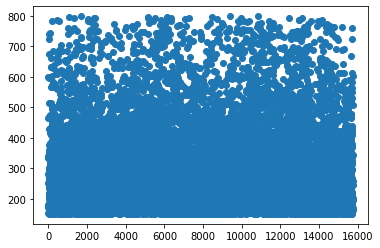

In [21]:
plt.scatter(range(len(lengths)),lengths)
plt.show()

In [31]:
with open(r'./user_history_smaller.py','w') as file:
    file.write('user_anime_dict=')
    file.write(str(user_dict))

In [39]:
anime_num_users_dict = {}
for key in user_dict.keys():
    temp = user_dict[key]
    for each in temp:
        if each not in anime_num_users_dict.keys():
            anime_num_users_dict[each] = 1
        else:
            anime_num_users_dict.update({each:anime_num_users_dict[each]+1})

In [40]:
print(len(anime_num_users_dict)) # number of animes

9096


In [43]:
path = r'./anime.csv'
anime_list=[]
genre_list=[]
keys = []
genres = []

with open(path, encoding='utf8') as file:
    line_no=-1
    for line in file:
        line = line[:-1]
        if line_no==-1:
            keys = line.split(',')
        else:
            anime = {}
            t = line.split('"')
            if len(t)==1:
                # this is when there is just 1 anime and 1 genre
                
                t = t[0].split(',')
                id = t[0]
                
                # check if the anime is in the list and its genre is not blank
                if id in anime_num_users_dict.keys() and t[2]!='':
                    for key, each in zip(keys,t):
                        if key != 'genre':
                            if key in ['episodes','rating','members']:
                                anime[key] = float(each)
                            else:
                                anime[key] = each
                    genres = [t[2]]
            else:
                if len(t[0].split(',')) == 2 and len(t) == 3:
                    # this is when there are multiple animes AND one genre
                    
                    id = t[0][:-1]
                    genre = t[-1].split(',')[1]
                    if id in anime_num_users_dict.keys() and genre!='':
                        anime[keys[0]] = id
                        anime[keys[1]] = t[1]
                        for key, each in zip(keys[3:], t[-1].split(',')[2:]):
#                             print(key, each)
                            if key in ['episodes','rating','members']:
                                anime[key] = float(each)
                            else:
                                anime[key] = each
                        genres = [genre]
                        
                elif len(t) > 3:
                    # this is when there are multiple animes AND multiple genres
                    
                    id = t[0][:-1]
                    if id in anime_num_users_dict.keys():
                        anime[keys[0]] = id
                        anime[keys[1]] = t[1]
                        for key, each in zip(keys[-4:], t[-1].split(',')[1:]):
                            if key in ['episodes','rating','members']:
                                anime[key] = float(each)
                            else:
                                anime[key] = each
                        genres = t[3].split(', ')
                else:
                    # this is when there are one anime AND multiple genres
                    
                    id = t[0].split(',')[0]
                    if id in anime_num_users_dict.keys():
                        anime[keys[0]] = id
                        anime[keys[1]] = t[0].split(',')[1]
                        for key, each in zip(keys[-4:], t[-1].split(',')[1:]):
                            if key in ['episodes','rating','members']:
                                if each not in ['Unknown','']:
                                    anime[key] = float(each)
                                else:
                                    anime[key] = 1
                            else:
                                anime[key] = each
                        genres = t[-2].split(', ')
                    
        for each in genres:
            if each not in genre_list:
                genre_list.append(each)
        
        if anime:
            anime['genre'] = genres
            anime['num_viewers'] = anime_num_users_dict[anime['anime_id']]
            anime_list.append(anime)
        line_no+=1

In [45]:
print(len(anime_list)) # actual number of animes

9079


In [44]:
print(genre_list, len(genre_list))

['Drama', 'Romance', 'School', 'Supernatural', 'Action', 'Adventure', 'Fantasy', 'Magic', 'Military', 'Shounen', 'Comedy', 'Historical', 'Parody', 'Samurai', 'Sci-Fi', 'Thriller', 'Sports', 'Super Power', 'Space', 'Slice of Life', 'Mecha', 'Music', 'Mystery', 'Seinen', 'Martial Arts', 'Vampire', 'Shoujo', 'Horror', 'Police', 'Psychological', 'Demons', 'Ecchi', 'Josei', 'Shounen Ai', 'Game', 'Dementia', 'Harem', 'Cars', 'Kids', 'Shoujo Ai', 'Hentai', 'Yaoi', 'Yuri'] 43


In [46]:
with open('anime_details.py', 'w', encoding='utf8') as file:
    file.write('anime_list_dict = ')
    file.write(str(anime_list))

In [49]:
# id_list = [each['anime_id'] for each in anime_list]
print(len(id_list))

9079


In [50]:
with open(r'./genre_onehot.py','w') as file:
    file.write('import numpy as np\n')
    file.write('genre_list='+str(genre_list)+'\n')
    file.write('id_list='+str(id_list)+'\n')
    file.write('id_genre=np.array([')
    for i, anime in enumerate(anime_list):
        file.write('[')
        for each in genre_list[:-1]:
            if each not in anime['genre']:
                file.write('0,')
            else:
                file.write('1,')
        if genre_list[-1] not in anime['genre']:
                file.write('0')
        else:
            file.write('1')
        if i==len(anime_list)-1:
            file.write(']')
        else:
            file.write('],')
    file.write('])')

In [80]:
from genre_onehot import id_genre

In [81]:
data = np.array(id_genre)
print(data.shape)

(9431, 43)


In [82]:
tsne = TSNE(n_components=3, random_state=0)
projections = tsne.fit_transform(data[:])

In [83]:
from sklearn.cluster import OPTICS

sc = OPTICS(min_samples=15)
t = sc.fit(data)

print(max(t.labels_))  

76


c:\users\rog\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_optics.py:804: RuntimeWarning:

divide by zero encountered in true_divide



In [84]:
fig = px.scatter_3d(projections,
                   x=0,
                   y=1,
                   z=2,
                   color=t.labels_)
fig.update_traces(marker_size=2)
fig.show()

In [85]:
from sklearn.cluster import AgglomerativeClustering

sc = AgglomerativeClustering(n_clusters=None,
                             distance_threshold = 10,
                  compute_full_tree=True)
t = sc.fit(data)

In [86]:
print(max(t.labels_))

69


In [87]:
fig = px.scatter_3d(projections,
                   x=0,
                   y=1,
                   z=2,
                   color=t.labels_)
fig.update_traces(marker_size=2)
fig.show()

In [ ]:
colors
for each in zip(range(max(t.labels_)), )

In [24]:
print(projection.shape)

(9431, 2)


In [27]:
labels = [str(each) for each in t.labels_]

fig = px.scatter(projection,x=0,y=1, color = t.labels_)
fig.update_traces(marker_size=2)
fig.show()
